In [1]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F
%matplotlib inline

In [5]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

In [6]:
print(PITdf.head)

<bound method NDFrame.head of         Year  Month  Day  Hour  Minute  DNI  Wind Speed  Wind Direction  \
0       1998      1    1     0       0  0.0         0.6           241.0   
1       1998      1    1     0      30  0.0         0.6           241.0   
2       1998      1    1     1       0  0.0         0.6           238.0   
3       1998      1    1     1      30  0.0         0.6           238.0   
4       1998      1    1     2       0  0.0         0.6           225.8   
...      ...    ...  ...   ...     ...  ...         ...             ...   
367915  2018     12   31    21      30  0.0         0.4           301.0   
367916  2018     12   31    22       0  0.0         0.4           298.0   
367917  2018     12   31    22      30  0.0         0.4           295.0   
367918  2018     12   31    23       0  0.0         0.5           293.0   
367919  2018     12   31    23      30  0.0         0.5           292.0   

          wind_x    wind_y         day_x     day_y    time_x    time_

# t-1 include time and date from one city

In [7]:
all_data = np.concatenate((PITdf['DNI'].values.reshape(-1,1), BUTdf['DNI'].values.reshape(-1,1), \
                           GREdf['DNI'].values.reshape(-1,1), ELVdf['DNI'].values.reshape(-1,1), \
                           WHLdf['DNI'].values.reshape(-1,1), STUdf['DNI'].values.reshape(-1,1), \
                           PITdf['day_x'].values.reshape(-1,1), PITdf['day_y'].values.reshape(-1,1), \
                           PITdf['time_x'].values.reshape(-1,1), PITdf['time_y'].values.reshape(-1,1)),axis = 1)
all_data.shape

(367920, 10)

In [8]:
test_length = 365 * 48 * 1
train_length = 365 * 48 * 5
all_data = all_data[:(train_length + test_length), :]
all_data.shape


(105120, 10)

In [9]:
inputs = all_data[:-1,:]
targets = all_data[1:,0]
print(inputs[25:35,:])
print(targets[25:35])

[[ 3.34000000e+02  8.25000000e+02  1.81000000e+02  8.42000000e+02
   8.49000000e+02  8.43000000e+02  1.72133562e-02  9.99851839e-01
  -1.30526192e-01 -9.91444861e-01]
 [ 8.44000000e+02  8.40000000e+02  3.40000000e+02  8.56000000e+02
   8.64000000e+02  8.57000000e+02  1.72133562e-02  9.99851839e-01
  -2.58819045e-01 -9.65925826e-01]
 [ 8.32000000e+02  8.27000000e+02  8.29000000e+02  8.43000000e+02
   8.52000000e+02  8.45000000e+02  1.72133562e-02  9.99851839e-01
  -3.82683432e-01 -9.23879533e-01]
 [ 8.25000000e+02  8.17000000e+02  8.27000000e+02  4.04000000e+02
   8.38000000e+02  8.29000000e+02  1.72133562e-02  9.99851839e-01
  -5.00000000e-01 -8.66025404e-01]
 [ 7.90000000e+02  7.82000000e+02  7.93000000e+02  7.93000000e+02
   8.05000000e+02  7.95000000e+02  1.72133562e-02  9.99851839e-01
  -6.08761429e-01 -7.93353340e-01]
 [ 7.46000000e+02  7.38000000e+02  7.53000000e+02  7.49000000e+02
   7.59000000e+02  7.51000000e+02  1.72133562e-02  9.99851839e-01
  -7.07106781e-01 -7.07106781e-01

In [10]:
X_train = inputs[:train_length,:]
y_train = targets[:train_length]

X_test = inputs[train_length:,:]
y_test = targets[train_length:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train[30:35,:], y_train[30:35])

(87600, 10) (87600,)
(17519, 10) (17519,)
[[ 7.46000000e+02  7.38000000e+02  7.53000000e+02  7.49000000e+02
   7.59000000e+02  7.51000000e+02  1.72133562e-02  9.99851839e-01
  -7.07106781e-01 -7.07106781e-01]
 [ 6.72000000e+02  6.63000000e+02  6.78000000e+02  6.77000000e+02
   6.88000000e+02  6.80000000e+02  1.72133562e-02  9.99851839e-01
  -7.93353340e-01 -6.08761429e-01]
 [ 5.70000000e+02  5.57000000e+02  5.73000000e+02  5.78000000e+02
   5.88000000e+02  5.82000000e+02  1.72133562e-02  9.99851839e-01
  -8.66025404e-01 -5.00000000e-01]
 [ 3.88000000e+02  3.71000000e+02  3.86000000e+02  4.04000000e+02
   4.19000000e+02  4.10000000e+02  1.72133562e-02  9.99851839e-01
  -9.23879533e-01 -3.82683432e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.72133562e-02  9.99851839e-01
  -9.65925826e-01 -2.58819045e-01]] [672. 570. 388.   0.   0.]


In [11]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [12]:
X_train_normalized = torch.from_numpy(X_train_normalized).float()
y_train = torch.squeeze(torch.from_numpy(y_train).float())

X_test_normalized = torch.from_numpy(X_test_normalized).float()



In [13]:
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.relu(self.fc3(x))


In [15]:
net1 = Net(X_train.shape[1])
criterion1 = nn.MSELoss()
optimizer = optim.Adam(net1.parameters(), lr = 0.01)


In [16]:
for epoch in range(1000):
    
    y_pred = net1(X_train_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion1(y_pred, y_train)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

tensor(117685.6875, grad_fn=<MseLossBackward>)
tensor(11051.8193, grad_fn=<MseLossBackward>)
tensor(10579.4629, grad_fn=<MseLossBackward>)
tensor(10495.7393, grad_fn=<MseLossBackward>)
tensor(10429.6377, grad_fn=<MseLossBackward>)
tensor(10270.1084, grad_fn=<MseLossBackward>)
tensor(10039.9707, grad_fn=<MseLossBackward>)
tensor(9899.7881, grad_fn=<MseLossBackward>)
tensor(9825.6914, grad_fn=<MseLossBackward>)
tensor(9847.5146, grad_fn=<MseLossBackward>)


In [17]:
y_test_pred = net1(X_test_normalized)
y_test_pred_np = y_test_pred.detach().numpy()[:,0]

Avg error: 1.9444552658559444
Avg absolute error: 42.77444866335183
Err Std: 95.76795914676653
Abs Err Std: 85.70664762411336


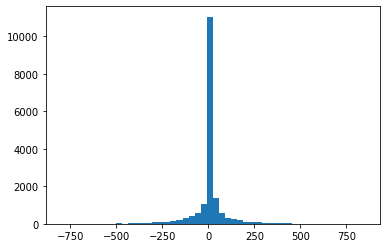

In [18]:
err = np.subtract(y_test_pred_np, y_test)
plt.hist(err, bins = 50)
mean_err = np.mean(err)
abserr = np.abs(err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(err)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))

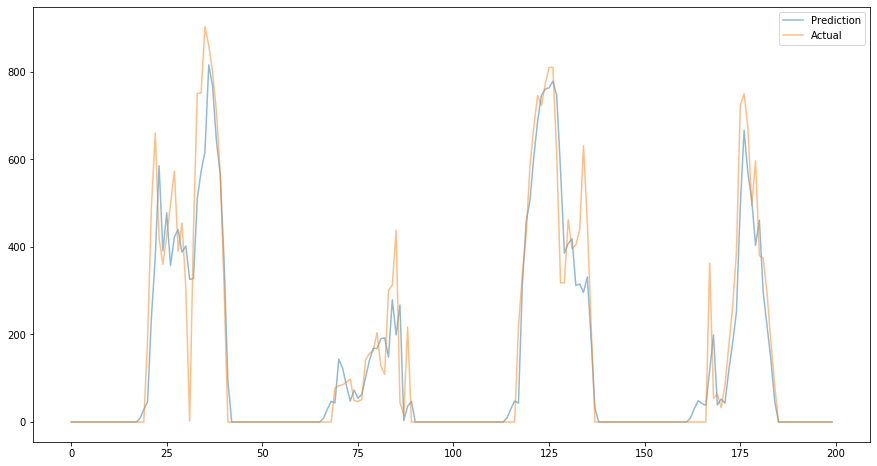

In [19]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(y_test[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.show()

# t-1  and t-2 include time and date from one city

In [33]:
inputs2 = np.concatenate((all_data[1:-1,:], all_data[:-2,:]), axis = 1)
targets2 = all_data[2:,0]

print(inputs2[15:20,:])
print(targets2[15:20])

[[ 1.59000000e+02  1.30000000e+02  1.73000000e+02  0.00000000e+00
   1.48000000e+02  0.00000000e+00  1.72133562e-02  9.99851839e-01
   8.66025404e-01 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.72133562e-02  9.99851839e-01  9.23879533e-01 -3.82683432e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.65000000e+02
   4.11000000e+02  1.70000000e+01  1.72133562e-02  9.99851839e-01
   7.93353340e-01 -6.08761429e-01  1.59000000e+02  1.30000000e+02
   1.73000000e+02  0.00000000e+00  1.48000000e+02  0.00000000e+00
   1.72133562e-02  9.99851839e-01  8.66025404e-01 -5.00000000e-01]
 [ 5.80000000e+02  5.63000000e+02  0.00000000e+00  1.45000000e+02
   5.71000000e+02  5.63000000e+02  1.72133562e-02  9.99851839e-01
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.65000000e+02  4.11000000e+02  1.70000000e+01
   1.72133562e-02  9.99851839e-01  7.93353340e-01 -6.08761429e-01]
 [ 1.67

In [34]:
X_train2 = inputs2[:train_length,:]
y_train2 = targets2[:train_length]

X_test2 = inputs2[train_length:,:]
y_test2 = targets2[train_length:]



In [35]:
scaler = MinMaxScaler()

X_train2_normalized = scaler.fit(X_train2)

X_train2_normalized = scaler.transform(X_train2)
X_test2_normalized = scaler.transform(X_test2)

print(X_train2_normalized.shape)

(87600, 20)


In [36]:
X_train2_normalized = torch.from_numpy(X_train2_normalized).float()
y_train2 = torch.squeeze(torch.from_numpy(y_train2).float())

X_test2_normalized = torch.from_numpy(X_test2_normalized).float()



In [37]:
net4 = Net(X_train2_normalized.shape[1])
print(net4)

Net(
  (fc1): Linear(in_features=20, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)


In [38]:
criterion1 = nn.MSELoss()
optimizer = optim.Adam(net4.parameters(), lr = 0.01)

In [39]:
for epoch in range(1000):
    
    y_pred = net4(X_train2_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion1(y_pred, y_train2)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

tensor(117710.1328, grad_fn=<MseLossBackward>)
tensor(11829.0752, grad_fn=<MseLossBackward>)
tensor(10515.4678, grad_fn=<MseLossBackward>)
tensor(10343.8066, grad_fn=<MseLossBackward>)
tensor(10213.5146, grad_fn=<MseLossBackward>)
tensor(10110.7373, grad_fn=<MseLossBackward>)
tensor(10018.7783, grad_fn=<MseLossBackward>)
tensor(9963.2568, grad_fn=<MseLossBackward>)
tensor(9928.1953, grad_fn=<MseLossBackward>)
tensor(9903.7363, grad_fn=<MseLossBackward>)


In [40]:
y_test_pred = net4(X_test2_normalized)
y_test_pred_np = y_test_pred.detach().numpy()[:,0]

Avg error: -0.39975801172277836
Avg absolute error: 43.523790275342684
Err Std: 96.49386883603798
Abs Err Std: 86.12146195625354


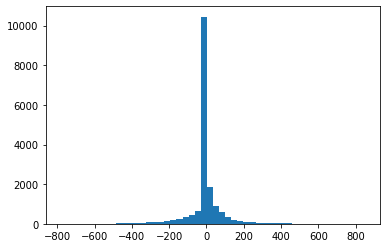

In [41]:
err = np.subtract(y_test_pred_np, y_test2)
plt.hist(err, bins = 50)
mean_err = np.mean(err)
abserr = np.abs(err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(err)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))

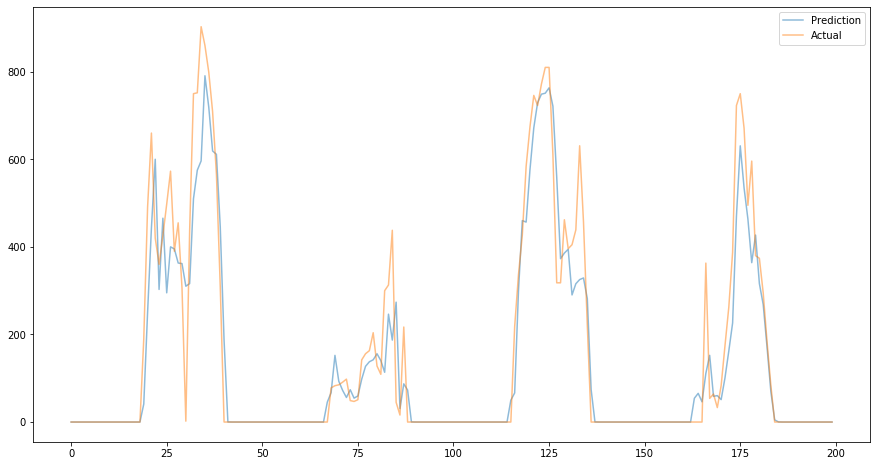

In [42]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(y_test2[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.show()

# Use t-1, t-2, t-3, and t-4 from 6 cities

In [43]:
inputs3 = np.concatenate((all_data[3:-1,:], all_data[2:-2,:], all_data[1:-3,:], all_data[:-4,:]), axis = 1)
targets3 = all_data[4:,0]

print(inputs3[15:20,:])
print(targets3[15:20])
print(inputs3.shape)

[[ 5.80000000e+02  5.63000000e+02  0.00000000e+00  1.45000000e+02
   5.71000000e+02  5.63000000e+02  1.72133562e-02  9.99851839e-01
   7.07106781e-01 -7.07106781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.65000000e+02  4.11000000e+02  1.70000000e+01
   1.72133562e-02  9.99851839e-01  7.93353340e-01 -6.08761429e-01
   1.59000000e+02  1.30000000e+02  1.73000000e+02  0.00000000e+00
   1.48000000e+02  0.00000000e+00  1.72133562e-02  9.99851839e-01
   8.66025404e-01 -5.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.72133562e-02  9.99851839e-01  9.23879533e-01 -3.82683432e-01]
 [ 1.67000000e+02  4.70000000e+01  2.90000000e+01  7.40000000e+01
   1.82000000e+02  1.21000000e+02  1.72133562e-02  9.99851839e-01
   6.08761429e-01 -7.93353340e-01  5.80000000e+02  5.63000000e+02
   0.00000000e+00  1.45000000e+02  5.71000000e+02  5.63000000e+02
   1.72133562e-02  9.99851839e-01  7.07106781e-01 -7.07106781e-01
   0.0000

In [44]:
X_train3 = inputs3[:train_length,:]
y_train3 = targets3[:train_length]

X_test3 = inputs3[train_length:,:]
y_test3 = targets3[train_length:]



In [45]:
scaler = MinMaxScaler()

X_train3_normalized = scaler.fit(X_train3)

X_train3_normalized = scaler.transform(X_train3)
X_test3_normalized = scaler.transform(X_test3)



In [46]:
X_train3_normalized = torch.from_numpy(X_train3_normalized).float()
y_train3 = torch.squeeze(torch.from_numpy(y_train3).float())

X_test3_normalized = torch.from_numpy(X_test3_normalized).float()



In [47]:
net5 = Net(X_train3.shape[1])
print(net5)

Net(
  (fc1): Linear(in_features=40, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)


In [48]:
criterion1 = nn.MSELoss()
optimizer = optim.Adam(net5.parameters(), lr = 0.01)

In [49]:
for epoch in range(1000):
    
    y_pred = net5(X_train3_normalized)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion1(y_pred, y_train3)
    
    if epoch % 100 == 0:
        print(train_loss)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

tensor(117715.3281, grad_fn=<MseLossBackward>)
tensor(12475.3359, grad_fn=<MseLossBackward>)
tensor(10597.6318, grad_fn=<MseLossBackward>)
tensor(10170.3623, grad_fn=<MseLossBackward>)
tensor(9945.2031, grad_fn=<MseLossBackward>)
tensor(9726.2139, grad_fn=<MseLossBackward>)
tensor(9622.0859, grad_fn=<MseLossBackward>)
tensor(9568.1680, grad_fn=<MseLossBackward>)
tensor(9536.7441, grad_fn=<MseLossBackward>)
tensor(9512.5283, grad_fn=<MseLossBackward>)


In [50]:
y_test_pred = net5(X_test3_normalized)
y_test_pred_np = y_test_pred.detach().numpy()[:,0]

Avg error: 1.7126638633565907
Avg absolute error: 42.1854498522434
Err Std: 94.93007537934778
Abs Err Std: 85.05903978885112


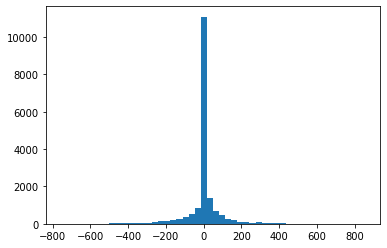

In [51]:
err = np.subtract(y_test_pred_np, y_test3)
plt.hist(err, bins = 50)
mean_err = np.mean(err)
abserr = np.abs(err)
mean_abs_err = np.mean(abserr)
std_abs_err = np.std(abserr)
std_err = np.std(err)
print('Avg error: ' + str(mean_err))
print('Avg absolute error: ' + str(mean_abs_err))
print('Err Std: ' + str(std_err))
print('Abs Err Std: ' + str(std_abs_err))

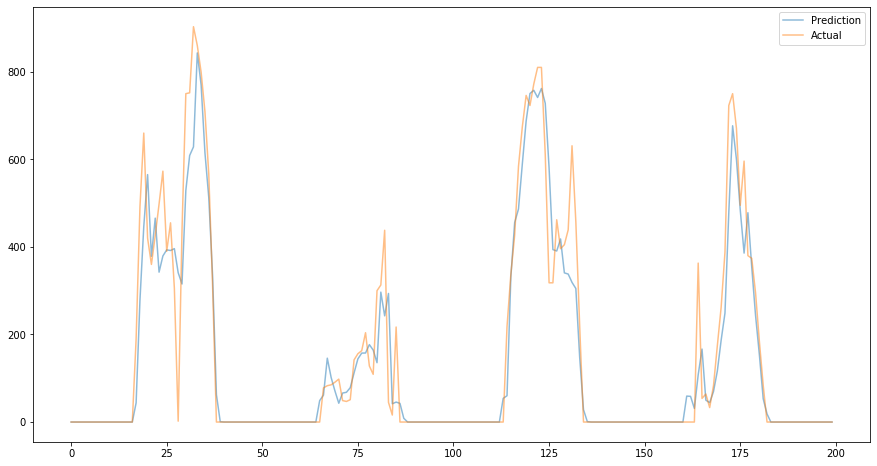

In [52]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
start = 2010
window = 200
plt.plot(y_test_pred_np[start:(start+window)],alpha = 0.5)
plt.plot(y_test3[start:(start+window)], alpha = 0.5)
plt.legend(['Prediction', 'Actual'])
plt.show()

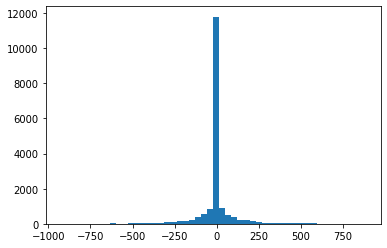

Avg half_hour_ROC: 0.0
Avg absolute half_hour_ROC: 49.11435912075364
Half_hour_ROC Std: 119.2235945051384
Abs half_hour_ROC Std: 108.63721836867559


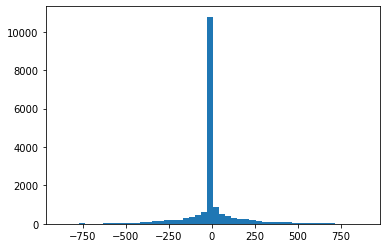

Avg hour_ROC: 0.0
Avg absolute hour_ROC: 72.59860682882265
Hour_ROC Std: 155.20239303029308
Abs Hour_ROC Std: 137.1758910626922


In [53]:
half_hour_ROC = y_test3[1:] - y_test3[:-1]
hour_ROC = y_test3[2:] - y_test3[:-2]
plt.hist(half_hour_ROC, bins = 50)
plt.show()
mean_half_hour_ROC = np.mean(half_hour_ROC)
abs_half_hour_ROC = np.abs(half_hour_ROC)
mean_abs_half_hour_ROC = np.mean(abs_half_hour_ROC)
std_abs_half_hour_ROC = np.std(abs_half_hour_ROC)
std_half_hour_ROC = np.std(half_hour_ROC)
print('Avg half_hour_ROC: ' + str(mean_half_hour_ROC))
print('Avg absolute half_hour_ROC: ' + str(mean_abs_half_hour_ROC))
print('Half_hour_ROC Std: ' + str(std_half_hour_ROC))
print('Abs half_hour_ROC Std: ' + str(std_abs_half_hour_ROC))

plt.hist(hour_ROC, bins = 50)
plt.show()
mean_hour_ROC = np.mean(hour_ROC)
abs_hour_ROC = np.abs(hour_ROC)
mean_abs_hour_ROC = np.mean(abs_hour_ROC)
std_abs_hour_ROC = np.std(abs_hour_ROC)
std_hour_ROC = np.std(hour_ROC)
print('Avg hour_ROC: ' + str(mean_hour_ROC))
print('Avg absolute hour_ROC: ' + str(mean_abs_hour_ROC))
print('Hour_ROC Std: ' + str(std_hour_ROC))
print('Abs Hour_ROC Std: ' + str(std_abs_hour_ROC))